In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


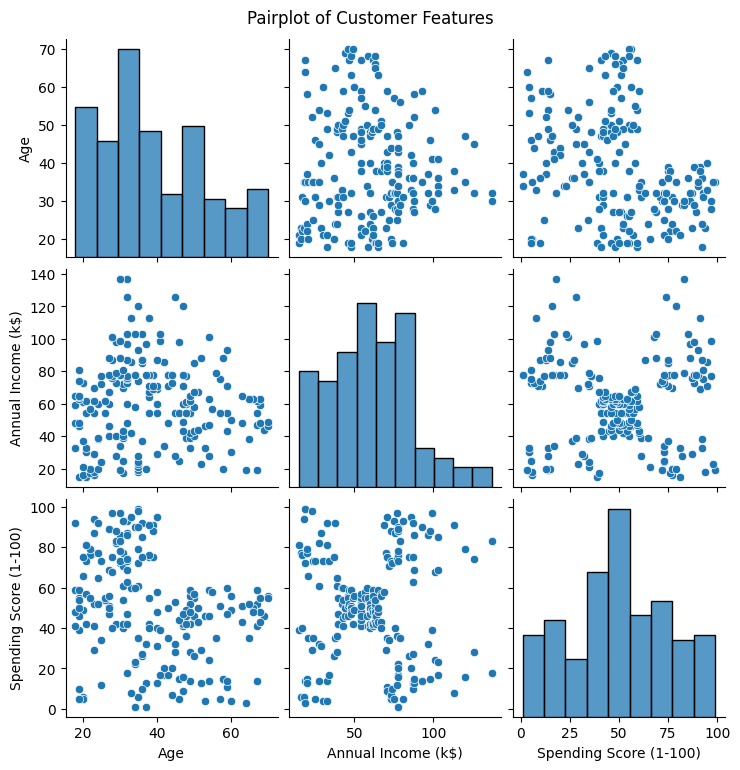

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.suptitle("Pairplot of Customer Features", y=1.02)
plt.show()


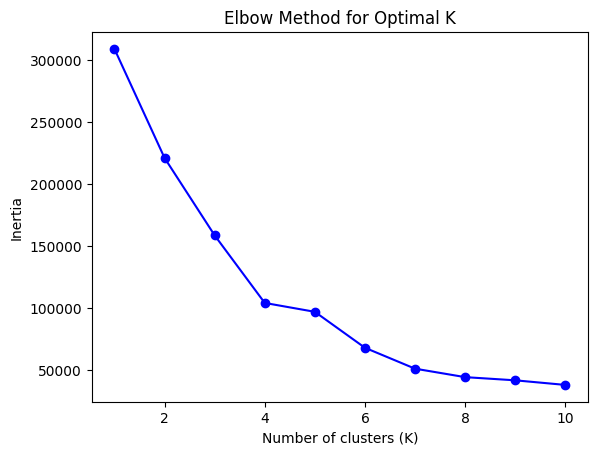

In [ ]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
# Assume K=5 from elbow method
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

print(df.head())


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        0
3   23                  16                      77        2
4   31                  17                      40        0


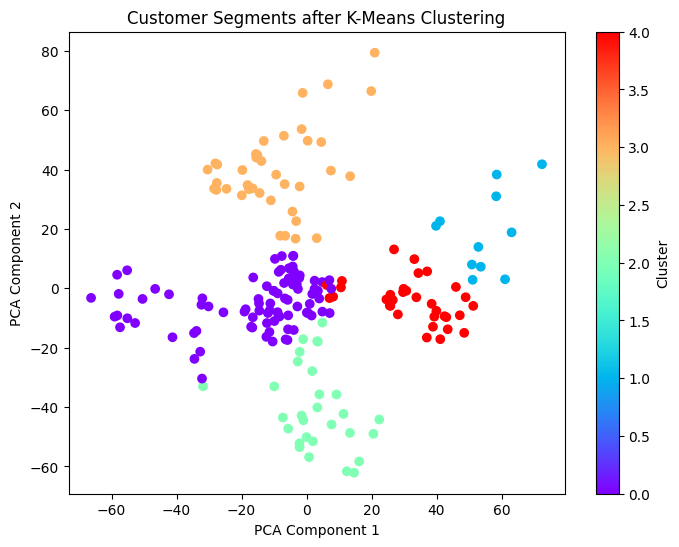

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='rainbow')
plt.title("Customer Segments after K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.36
